In [1]:
import tensorflow as tf
import numpy      as np
import pandas     as pd
import seaborn    as sns

import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

from   sklearn.model_selection import train_test_split , KFold, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV

from   sklearn.metrics         import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , precision_recall_curve, roc_curve, roc_auc_score

from   sklearn.metrics         import mean_squared_error, mean_absolute_error, r2_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, IncrementalPCA

from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler , Binarizer, PolynomialFeatures, RobustScaler

from   sklearn.linear_model    import LogisticRegression , LinearRegression    

from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import KFold
from   sklearn.svm             import SVC, SVR, LinearSVR
from   lightgbm                import LGBMRegressor
# from sklearn. import LinearRegression


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
def regression_model_predict(model, X_train, X_test, y_train, y_test, isFlag = False ) :
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if isFlag :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print(model.__class__.__name__, '-->')
    
    regression_eval(y_test, pred)

def regression_eval(y_test, y_pred) :
    print('회귀 평가 지표 확인 - ')
    print('MAE   - ' , mean_absolute_error(y_test, y_pred))
    print('MSE   - ' , mean_squared_error(y_test, y_pred))
    print('RMSE  - ' , np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R2 SCORE - ', r2_score(y_test, y_pred))
    
    # rmsle 언더플로우 영향으로 로그변환이 필요함
    log_y    = np.log1p(y_test)
    log_pred = np.log1p(y_pred)
    error    = (log_y - log_pred) ** 2
    print('RMSLE - ' ,  np.sqrt(np.mean(error)))
    print()

In [3]:
result_frm = pd.DataFrame({'Category':['Model_NM','Model_NM_2','Params', 'MAE','MSE','RMSE','R2_SCORE','RMSLE']})


def regression_predict_eval_frm(model, X_train, X_test, y_train, y_test, isFlag = False) :
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if isFlag :
        y_test = np.expm1(y_test)
        y_pred = np.expm1(y_pred)
    print(model.__class__.__name__, '-->')
    
    print('회귀 평가 지표 확인 - ')
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2score = r2_score(y_test, y_pred)
    print('MAE      - ' , mae)
    print('MSE      - ' , mse)
    print('RMSE     - ' , rmse)
    print('R2 SCORE - ', r2score)
    
    # rmsle 언더플로우 영향으로 로그변환이 필요함
    log_y    = np.log1p(y_test)
    log_pred = np.log1p(y_pred)
    error    = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(error))
    print('RMSLE - ' , rmsle)
    print()
    msg = list(X_data.columns)
#     msg = input('any message?')
    # dataframe 에 결과값 추가
    result_frm[result_frm.shape[1]] = [model.__class__.__name__, msg, model.get_params(), 
                                      mae, mse, rmse, r2score, rmsle]
    display(result_frm)

In [4]:
hospital_f = pd.read_csv('Z:/공모전/날씨빅데이터콘테스트(공유)/data/test/hospital_female_0802_test2.csv', encoding='cp949')
hospital_female = hospital_f[hospital_f['yyyy'].astype(str).str.contains('2012|2013|2014|2015')].reset_index(drop=True) #2016년 전만 추출

In [5]:
hospital_female

,area,tma,yyyy,mm,dd,weekday,sum_gsr,sum_rn,avg_ps,max_ps,...,avg_hum,diff_hum,min_temp,max_temp,avg_temp,diff_temp,pm10_3b,pm10_7b,pm10_31b,frequency
0,강원,2012-01-01,2012,1,1,6,0.000000,0.173611,1023.886667,1026.533333,...,58.333333,65.0,-7.3,5.0,-2.344048,12.3,87.662500,30.158333,15.678261,3.0
1,경기,2012-01-01,2012,1,1,6,0.000000,0.037736,1024.875000,1027.225000,...,50.733333,27.0,-6.9,1.0,-3.010000,7.9,106.851851,28.537404,13.474891,5.0
2,경남,2012-01-01,2012,1,1,6,0.000000,0.065789,1022.950000,1024.900000,...,44.916667,47.0,-2.9,7.0,1.642857,9.9,72.989269,26.719907,16.193461,1.0
3,경북,2012-01-01,2012,1,1,6,0.000702,0.721053,1023.268000,1025.488000,...,52.377778,70.0,-5.9,6.1,0.075556,12.0,88.189236,25.336806,12.743785,1.0
4,광주,2012-01-01,2012,1,1,6,0.000000,0.700000,1025.250000,1027.250000,...,75.833333,15.0,-0.9,3.0,0.383333,3.9,62.750000,18.958333,8.566667,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24832,전남,2015-12-31,2015,12,31,3,0.000000,1.608108,1031.053846,1034.280769,...,66.764033,65.0,-2.3,10.0,4.105198,12.3,23.382672,46.708333,48.514658,3.0
24833,전북,2015-12-31,2015,12,31,3,1.305806,0.967742,1031.300000,1034.478571,...,73.750000,50.0,-3.0,7.0,2.132162,10.0,36.292835,72.548882,56.803399,0.0
24834,제주,2015-12-31,2015,12,31,3,0.000000,0.971429,1030.792308,1034.553846,...,59.915541,33.0,5.4,10.3,7.709797,4.9,27.340580,56.156250,48.416667,0.0
24835,충남,2015-12-31,2015,12,31,3,1.757273,0.196970,1031.513333,1034.120000,...,74.725225,55.0,-3.0,6.0,1.345383,9.0,28.104167,79.543252,45.036458,0.0


In [6]:
hospital_female.columns

Index(['area', 'tma', 'yyyy', 'mm', 'dd', 'weekday', 'sum_gsr', 'sum_rn',
       'avg_ps', 'max_ps', 'min_ps', 'so2', 'o3', 'pm10', 'sex', 'elderly_pop',
       'total_pop', 'elderly_ratio', 'avg_age', 'min_max_ps', 'D/R',
       'heat_wave', 'cold_wave', 'min_hum', 'max_hum', 'avg_hum', 'diff_hum',
       'min_temp', 'max_temp', 'avg_temp', 'diff_temp', 'pm10_3b', 'pm10_7b',
       'pm10_31b', 'frequency'],
      dtype='object')

In [7]:
hospital_female2 = hospital_female[['area','mm','weekday','heat_wave','cold_wave','total_pop','elderly_ratio',
                                     'pm10_7b','diff_hum','diff_temp','avg_ps',
                                     'avg_age','min_max_ps', 'sum_rn','frequency']]

In [ ]:
f_cols = ['area','mm','weekday','heat_wave','cold_wave','total_pop','elderly_ratio','sex', 
        'sum_gsr','max_hum', 
        'pm10_7b','diff_hum','diff_temp','avg_ps',
        'o3','avg_age','min_max_ps', 'avg_hum','frequency']

hospital_female2 = hospital_female[f_cols]

In [8]:
mapping = {'강원':0, '경기':1, '경남':2, '경북':3, '광주':4, '대구':5,
           '대전':6, '부산':7, '서울':8, '울산':9, '인천':10,
           '전남':11, '전북':12, '제주':13, '충남':14, '충북':15, '세종':16}

In [9]:
hospital_female2.insert(1, 'area_label', hospital_female2['area'].map(mapping))

In [10]:
hospital_female2.drop(columns=['area'], inplace=True)

C:\Users\dltmf\AppData\Local\Temp\ipykernel_26928\3562702183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_female2.drop(columns=['area'], inplace=True)


In [11]:
hospital_female2

,area_label,mm,weekday,sum_rn,avg_ps,o3,total_pop,elderly_ratio,avg_age,min_max_ps,heat_wave,cold_wave,diff_hum,diff_temp,pm10_7b,frequency
0,0,1,6,0.173611,1023.886667,0.027750,762617,18.053361,42.4,6.340000,0,0,65.0,12.3,30.158333,3.0
1,1,1,6,0.037736,1024.875000,0.023165,5928150,10.649039,37.7,5.500000,0,0,27.0,7.9,28.537404,5.0
2,2,1,6,0.065789,1022.950000,0.027277,1644251,15.076105,40.5,5.200000,0,0,47.0,9.9,26.719907,1.0
3,3,1,6,0.721053,1023.268000,0.027274,1342455,19.248690,43.2,5.688000,0,0,70.0,12.0,25.336806,1.0
4,4,1,6,0.700000,1025.250000,0.027300,738784,11.037868,37.6,4.100000,0,0,15.0,3.9,18.958333,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24832,11,12,3,1.608108,1031.053846,0.035985,955115,24.847060,45.9,6.892308,0,0,65.0,12.3,46.708333,3.0
24833,12,12,3,0.967742,1031.300000,0.028738,939456,21.104873,44.2,7.014286,0,0,50.0,10.0,72.548882,0.0
24834,13,12,3,0.971429,1030.792308,0.044719,310967,16.470236,41.5,7.523077,0,0,33.0,4.9,56.156250,0.0
24835,14,12,3,0.196970,1031.513333,0.024484,1023210,19.459055,43.1,6.800000,0,0,55.0,9.0,79.543252,0.0


In [12]:
X_data = hospital_female2.drop(['frequency'], axis=1)
y_data = hospital_female2[['frequency']]

print('X_data')
display(X_data.head())
print('y_data')
display(y_data.head())

X_data


,area_label,mm,weekday,sum_rn,avg_ps,o3,total_pop,elderly_ratio,avg_age,min_max_ps,heat_wave,cold_wave,diff_hum,diff_temp,pm10_7b
0,0,1,6,0.173611,1023.886667,0.027750,762617,18.053361,42.4,6.340,0,0,65.0,12.3,30.158333
1,1,1,6,0.037736,1024.875000,0.023165,5928150,10.649039,37.7,5.500,0,0,27.0,7.9,28.537404
2,2,1,6,0.065789,1022.950000,0.027277,1644251,15.076105,40.5,5.200,0,0,47.0,9.9,26.719907
3,3,1,6,0.721053,1023.268000,0.027274,1342455,19.248690,43.2,5.688,0,0,70.0,12.0,25.336806
4,4,1,6,0.700000,1025.250000,0.027300,738784,11.037868,37.6,4.100,0,0,15.0,3.9,18.958333


y_data


,frequency
0,3.0
1,5.0
2,1.0
3,1.0
4,2.0


In [13]:
# X_data scaling : normalization (MinMaxScaler) // y_data scaling : log
n_scaler = MinMaxScaler()
X_scaled = n_scaler.fit_transform(X_data)

# y_data scaling : log1p
y_scaled = np.log1p(y_data)

In [72]:
# lda = LinearDiscriminantAnalysis(n_components=5)
# pca = PCA(n_components='mle') # pca 이용해서 진행

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y_scaled['frequency'],
                                                   test_size = .2,
                                                    shuffle=True,
                                                   random_state = 123)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19869, 15), (4968, 15), (19869,), (4968,))

In [74]:
# pca.fit(X_train)
# train_reduced = pca.fit_transform(X_train)
# test_reduced = pca.transform(X_test)

In [17]:
hospital_female2.isnull().sum()

area_label       0
mm               0
weekday          0
sum_rn           0
avg_ps           0
o3               0
total_pop        0
elderly_ratio    0
avg_age          0
min_max_ps       0
heat_wave        0
cold_wave        0
diff_hum         0
diff_temp        0
pm10_7b          0
frequency        0
dtype: int64

In [76]:
poly = PolynomialFeatures(degree=3, include_bias=False)

poly.fit(X_train)
train_poly = poly.transform(X_train)
test_poly  = poly.transform(X_test)

In [77]:
svr = SVR(kernel='rbf')
svr.fit(train_poly, y_train)

regression_predict_eval_frm(svr, train_poly, test_poly, y_train, y_test, isFlag=True)
result_frm.to_csv('./result_frm.csv', encoding='utf-8')

SVR -->
회귀 평가 지표 확인 - 
MAE      -  0.884763474788205
MSE      -  1.543849338047396
RMSE     -  1.2425173391335012
R2 SCORE -  0.4205640450588555
RMSLE -  0.4751079173613276



,Category,1,2
0,Model_NM,SVR,SVR
1,Model_NM_2,"[area_label, yyyy, mm, dd, weekday, sum_rn, av...","[area_label, mm, weekday, sum_rn, avg_ps, o3, ..."
2,Params,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...","{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd..."
3,MAE,0.886374,0.884763
4,MSE,1.539807,1.543849
5,RMSE,1.24089,1.242517
6,R2_SCORE,0.422081,0.420564
7,RMSLE,0.475954,0.475108


In [78]:
lgbm = LGBMRegressor()
lgbm.fit(train_poly, y_train)
regression_predict_eval_frm(lgbm, train_poly, test_poly, y_train, y_test, isFlag=True)
result_frm.to_csv('./result_frm.csv', encoding='utf-8')

LGBMRegressor -->
회귀 평가 지표 확인 - 
MAE      -  0.9019249806969999
MSE      -  1.6017190839589823
RMSE     -  1.265590409239491
R2 SCORE -  0.3988444311962158
RMSLE -  0.4735889182357715



,Category,1,2,3
0,Model_NM,SVR,SVR,LGBMRegressor
1,Model_NM_2,"[area_label, yyyy, mm, dd, weekday, sum_rn, av...","[area_label, mm, weekday, sum_rn, avg_ps, o3, ...","[area_label, mm, weekday, sum_rn, avg_ps, o3, ..."
2,Params,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...","{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...","{'boosting_type': 'gbdt', 'class_weight': None..."
3,MAE,0.886374,0.884763,0.901925
4,MSE,1.539807,1.543849,1.601719
5,RMSE,1.24089,1.242517,1.26559
6,R2_SCORE,0.422081,0.420564,0.398844
7,RMSLE,0.475954,0.475108,0.473589


In [80]:
# print(list(result_frm.loc[[1],12]))
# print(list(result_frm.loc[[1],14]))

In [81]:
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_data, i) for i in range(X_data.shape[1])]
vif["features"] = X_data.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.049547,heat_wave
1,1.073137,cold_wave
2,1.226691,sum_rn
3,1.418310,min_max_ps
4,2.524308,total_pop
5,3.261508,weekday
6,4.778337,area_label
7,5.059864,pm10_7b
8,5.308240,mm
9,8.313456,o3


In [19]:
vif['features']

0         heat_wave
1         cold_wave
2            sum_rn
3        min_max_ps
4         total_pop
5           weekday
6        area_label
7           pm10_7b
8                mm
9                o3
10        diff_temp
11         diff_hum
12    elderly_ratio
13           avg_ps
14          avg_age
Name: features, dtype: object

In [445]:
# from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [446]:
# ridge = Ridge(alpha = 1)
# ridge.fit(train_poly, y_train)

# regression_model_predict(ridge, train_poly, test_poly, y_train, y_test, isFlag = True )

# print(ridge.score(train_poly, y_train))
# print(ridge.score(test_poly, y_test))

In [447]:
# las = Lasso(alpha = 1)
# las.fit(train_poly, y_train)

# regression_model_predict(las, train_poly, test_poly, y_train, y_test, isFlag = True )

# print(las.score(train_poly, y_train))
# print(las.score(test_poly, y_test))

In [448]:
# ela = ElasticNet(alpha = 0.1)
# ela.fit(train_poly, y_train)

# regression_model_predict(ela, train_poly, test_poly, y_train, y_test, isFlag = True )

# print(ela.score(train_poly, y_train))
# print(ela.score(test_poly, y_test))

## Deep learning

In [322]:
hospital_f = pd.read_csv('Z:/공모전/날씨빅데이터콘테스트(공유)/data/test/hospital_female_0802_test2.csv', encoding='cp949')
hospital_female = hospital_f[hospital_f['yyyy'].astype(str).str.contains('2012|2013|2014|2015')].reset_index(drop=True) #2016년 전만 추출

In [284]:
hospital_female2 = hospital_female[['area','mm','weekday','heat_wave','cold_wave','total_pop','elderly_ratio',
                                     'pm10_7b','diff_hum','diff_temp','avg_ps',
                                     'avg_age','min_max_ps', 'sum_rn','frequency']]

In [328]:
f_cols = ['area','mm','weekday','heat_wave','cold_wave','total_pop','elderly_ratio', 
        'sum_gsr','max_hum', 
        'pm10_7b','diff_hum','diff_temp','avg_ps',
        'o3','avg_age','min_max_ps', 'avg_hum','frequency']

hospital_female2 = hospital_female[f_cols]

In [329]:
mapping = {'강원':0, '경기':1, '경남':2, '경북':3, '광주':4, '대구':5,
           '대전':6, '부산':7, '서울':8, '울산':9, '인천':10,
           '전남':11, '전북':12, '제주':13, '충남':14, '충북':15, '세종':16}

In [330]:
hospital_female2.insert(1, 'area_label', hospital_female2['area'].map(mapping))
hospital_female2.drop(columns=['area'], inplace=True)

C:\Users\dltmf\AppData\Local\Temp\ipykernel_26928\2329202907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_female2.drop(columns=['area'], inplace=True)


In [331]:
hospital_female2

,area_label,mm,weekday,heat_wave,cold_wave,total_pop,elderly_ratio,sum_gsr,max_hum,pm10_7b,diff_hum,diff_temp,avg_ps,o3,avg_age,min_max_ps,avg_hum,frequency
0,0,1,6,0,0,762617,18.053361,0.000000,95.0,30.158333,65.0,12.3,1023.886667,0.027750,42.4,6.340000,58.333333,3.0
1,1,1,6,0,0,5928150,10.649039,0.000000,65.0,28.537404,27.0,7.9,1024.875000,0.023165,37.7,5.500000,50.733333,5.0
2,2,1,6,0,0,1644251,15.076105,0.000000,78.0,26.719907,47.0,9.9,1022.950000,0.027277,40.5,5.200000,44.916667,1.0
3,3,1,6,0,0,1342455,19.248690,0.000702,90.0,25.336806,70.0,12.0,1023.268000,0.027274,43.2,5.688000,52.377778,1.0
4,4,1,6,0,0,738784,11.037868,0.000000,85.0,18.958333,15.0,3.9,1025.250000,0.027300,37.6,4.100000,75.833333,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24832,11,12,3,0,0,955115,24.847060,0.000000,95.0,46.708333,65.0,12.3,1031.053846,0.035985,45.9,6.892308,66.764033,3.0
24833,12,12,3,0,0,939456,21.104873,1.305806,95.0,72.548882,50.0,10.0,1031.300000,0.028738,44.2,7.014286,73.750000,0.0
24834,13,12,3,0,0,310967,16.470236,0.000000,78.0,56.156250,33.0,4.9,1030.792308,0.044719,41.5,7.523077,59.915541,0.0
24835,14,12,3,0,0,1023210,19.459055,1.757273,95.0,79.543252,55.0,9.0,1031.513333,0.024484,43.1,6.800000,74.725225,0.0


In [332]:
X_f_data = hospital_female2.drop(['frequency'], axis=1)
y_f_data = hospital_female2[['frequency']]

print('X_f_data')
display(X_f_data.head())
print('y_f_data')
display(y_f_data.head())

X_f_data


,area_label,mm,weekday,heat_wave,cold_wave,total_pop,elderly_ratio,sum_gsr,max_hum,pm10_7b,diff_hum,diff_temp,avg_ps,o3,avg_age,min_max_ps,avg_hum
0,0,1,6,0,0,762617,18.053361,0.000000,95.0,30.158333,65.0,12.3,1023.886667,0.027750,42.4,6.340,58.333333
1,1,1,6,0,0,5928150,10.649039,0.000000,65.0,28.537404,27.0,7.9,1024.875000,0.023165,37.7,5.500,50.733333
2,2,1,6,0,0,1644251,15.076105,0.000000,78.0,26.719907,47.0,9.9,1022.950000,0.027277,40.5,5.200,44.916667
3,3,1,6,0,0,1342455,19.248690,0.000702,90.0,25.336806,70.0,12.0,1023.268000,0.027274,43.2,5.688,52.377778
4,4,1,6,0,0,738784,11.037868,0.000000,85.0,18.958333,15.0,3.9,1025.250000,0.027300,37.6,4.100,75.833333


y_f_data


,frequency
0,3.0
1,5.0
2,1.0
3,1.0
4,2.0


In [333]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_f_data, i) for i in range(X_f_data.shape[1])]
vif["features"] = X_f_data.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.053691,heat_wave
1,1.087831,cold_wave
2,1.122968,sum_gsr
3,1.421118,min_max_ps
4,2.539396,total_pop
5,3.261610,weekday
6,4.832735,area_label
7,5.064821,pm10_7b
8,5.552380,mm
9,8.413825,o3


In [334]:
f_scaler = MinMaxScaler()
X_f_norm = f_scaler.fit_transform(X_f_data)

In [335]:
y_f_data_reshape = np.array(y_f_data['frequency']).reshape(-1,1)
y_f_data_reshape.shape

(24837, 1)

In [336]:
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f_norm, 
                                                            y_f_data_reshape,
                                                            test_size = .2,
                                                            shuffle=True,
                                                            random_state = 1)

In [293]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [294]:
def R_squared(y, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
    r2 = tf.subtract(1.0, tf.divide(residual, total))
    return r2

In [295]:
X_f_train.shape

(19869, 14)

In [337]:
# tf.random.set_seed(1)

model_female = tf.keras.Sequential()

#입력 8개로부터 전달받는 12개 노드의 layer 생성
model_female.add(layers.Dense(64, input_shape=(X_f_train.shape[1],)))  
model_female.add(layers.Activation('relu'))  

model_female.add(layers.Dense(32))         
model_female.add(layers.Activation('relu'))

# model_female.add(layers.Dense(16))         
# model_female.add(layers.Activation('relu'))

#회귀모형(regression) 구축을 위해서 linear 활성함수 사용
model_female.add(layers.Dense(1))
model_female.add(layers.Activation('linear')) 

opt = optimizers.SGD(lr = 0.001)
opt1 = optimizers.Adam(learning_rate=0.001)

# 모델 구축하기
model_female.compile(
#                     optimizer = opt1,
                    loss='mse',         # mean_squared_error(평균제곱오차)의 alias
                    optimizer='adam',   # 최적화 기법 중 하나
                    metrics=[tf.keras.metrics.RootMeanSquaredError(), R_squared])    # 실험 후 관찰하고 싶은 metric 들을 나열함. 

In [338]:
'''
10개에 한 번씩 업데이터 실행
0:미출력, 1:진행상황출력, 2:에포크당 출력
'''
hist_female = model_female.fit(
                        X_f_train, y_f_train,
                        batch_size=10,    
                        epochs=150,       
                        validation_split=0.2,  
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)],  
                        verbose=2) 

# 테스트 데이터 입력
scores_female = model_female.evaluate(X_f_test, y_f_test)
print('test_loss: ', scores_female[0])
print('test_rmse: ', scores_female[1])
print('test_r2: ', scores_female[2])

# 모델 저장
# model_female.save("dnn_weather_hospital_f_0804.h5")

Epoch 1/150
1590/1590 - 2s - loss: 1.7203 - root_mean_squared_error: 1.3116 - R_squared: 0.0809 - val_loss: 1.5739 - val_root_mean_squared_error: 1.2545 - val_R_squared: 0.1559
Epoch 2/150
1590/1590 - 2s - loss: 1.5893 - root_mean_squared_error: 1.2607 - R_squared: 0.1539 - val_loss: 1.5062 - val_root_mean_squared_error: 1.2273 - val_R_squared: 0.0950
Epoch 3/150
1590/1590 - 2s - loss: 1.5772 - root_mean_squared_error: 1.2559 - R_squared: 0.1845 - val_loss: 1.4809 - val_root_mean_squared_error: 1.2169 - val_R_squared: 0.1348
Epoch 4/150
1590/1590 - 2s - loss: 1.5684 - root_mean_squared_error: 1.2524 - R_squared: 0.1345 - val_loss: 1.4806 - val_root_mean_squared_error: 1.2168 - val_R_squared: 0.1226
Epoch 5/150
1590/1590 - 1s - loss: 1.5597 - root_mean_squared_error: 1.2489 - R_squared: -inf - val_loss: 1.5295 - val_root_mean_squared_error: 1.2367 - val_R_squared: 0.0549
Epoch 6/150
1590/1590 - 2s - loss: 1.5636 - root_mean_squared_error: 1.2505 - R_squared: 0.1716 - val_loss: 1.4897 - 

In [339]:
# 관찰된 metric 값들을 확인함
for i in range(len(scores_female)):
    print("%s: %.3f" % (model_female.metrics_names[i], scores_female[i]))

loss: 1.509
root_mean_squared_error: 1.229
R_squared: 0.363


In [171]:
def adj_r2_score(y_true, y_pred, p=X_data.shape[1]): 
    return 1-(1-r2_score(y_true, y_pred)) * (len(y_true)-1) / (len(y_true) - p - 1)

In [152]:
adj_r2_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [4968, 6222]

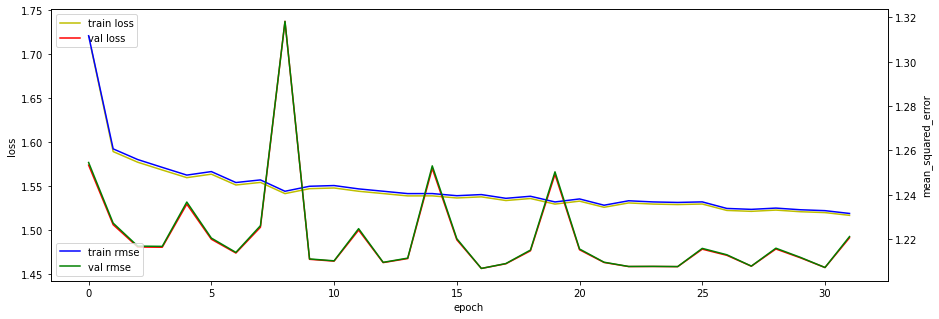

In [340]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(15, 5))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist_female.history['loss'], 'y', label='train loss')   # 훈련데이터의 loss (즉, mse)
loss_ax.plot(hist_female.history['val_loss'], 'r', label='val loss') # 검증데이터의 loss (즉, mse)

acc_ax.plot(hist_female.history['root_mean_squared_error'], 'b', label='train rmse')   # 훈련데이터의 mae
acc_ax.plot(hist_female.history['val_root_mean_squared_error'], 'g', label='val rmse') # 검증데이터의 mae

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mean_squared_error')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

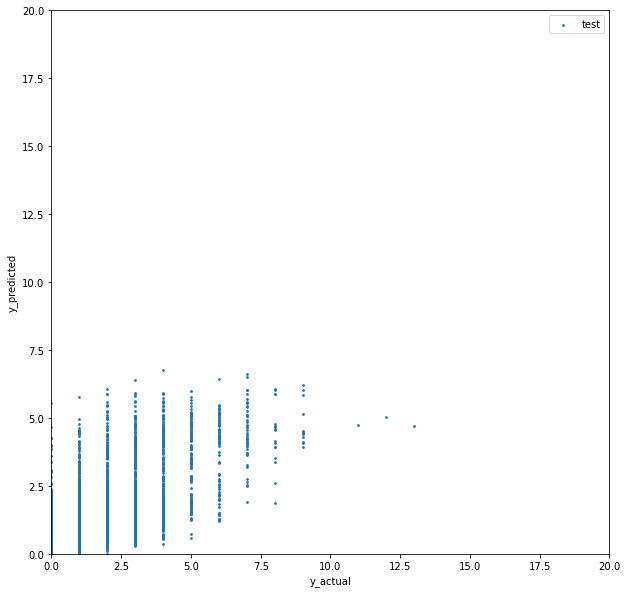

In [341]:
import matplotlib.pyplot as plt

# test data에 대한 예측값
y_f_pred = model_female.predict(X_f_test)

# 그림 가로, 세로 크기
plt.figure(figsize=(10,10))  

#test data의 실제 y값과 예측 y값을 입력 => y=x 그래프와 가까울수록 정확
plt.scatter(y_f_test, y_f_pred, label="test", s=3)  
# plt.title('test title')

# X축 이름
plt.xlabel('y_actual')   
# Y축 이름
plt.ylabel('y_predicted')

# 범례표시
plt.legend()

# X축 표시 범위, Y축 표시 범위 
plt.xlim((0,20))  
plt.ylim((0,20))  

plt.show()

## 2016년 예측(여자)

In [281]:
f_cols_1 = ['area','mm','weekday','heat_wave','cold_wave','total_pop','elderly_ratio',
             'pm10_7b','diff_hum','diff_temp','avg_ps',
             'avg_age','min_max_ps', 'sum_rn','frequency']

f_cols_2 = ['area','mm','weekday','heat_wave','cold_wave','total_pop','elderly_ratio','sex', 
        'sum_gsr','max_hum', 
        'pm10_7b','diff_hum','diff_temp','avg_ps',
        'o3','avg_age','min_max_ps', 'avg_hum','frequency']

In [342]:
# testset ('2016)
testset_female = hospital_f[hospital_f['yyyy'].astype(str).str.contains('2016')].reset_index(drop=True)
testset_female2 = testset_female[f_cols]

testset_female2.insert(1, 'area_label', testset_female2['area'].map(mapping))
testset_female2.drop(columns=['area'], inplace=True)

X_f_new = testset_female2.drop(['frequency'], axis=1)  # frequency NaN 이기 때문에 y_new 만들지 않음

print('X_f_new')
display(X_f_new.head())

# X를 정규화
X_f_new_norm = f_scaler.transform(X_f_new)   
print(X_f_new_norm.shape)
print(X_f_new_norm)

y_f_pred = model_female.predict(X_f_new_norm)

# y_pred 음수일 경우 0으로 처리
new_y_f_pred = np.where(y_f_pred < 0, 0,y_f_pred)
new_y_f_pred

print("y_pred = ", new_y_f_pred)
print(y_f_pred)

X_f_new


C:\Users\dltmf\AppData\Local\Temp\ipykernel_26928\4147927298.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testset_female2.drop(columns=['area'], inplace=True)


,area_label,mm,weekday,heat_wave,cold_wave,total_pop,elderly_ratio,sum_gsr,max_hum,pm10_7b,diff_hum,diff_temp,avg_ps,o3,avg_age,min_max_ps,avg_hum
0,0,1,4,0,0,768008,19.916980,0.000000,95.0,61.954167,73.0,18.9,1030.230000,0.024237,44.5,8.010000,58.196911
1,1,1,4,0,0,6229840,12.194759,0.000000,90.0,42.487621,45.0,12.1,1031.633333,0.014370,39.7,7.016667,70.844595
2,2,1,4,0,0,1669577,16.753405,1.634500,94.0,29.128224,79.0,17.7,1031.175000,0.029582,42.4,5.616667,52.099421
3,3,1,4,0,0,1344592,21.253882,0.001404,90.0,38.389385,66.0,20.0,1030.309524,0.033232,45.1,6.233333,57.314554
4,4,1,4,0,0,742807,13.091826,0.000000,80.0,20.475000,40.0,10.0,1032.200000,0.025175,39.7,5.850000,62.837838


(6222, 17)
[[0.         0.         0.66666667 ... 0.83333333 0.50170215 0.47907103]
 [0.0625     0.         0.66666667 ... 0.26190476 0.50076477 0.64599744]
 [0.125      0.         0.66666667 ... 0.58333333 0.49944363 0.39859525]
 ...
 [0.8125     1.         0.83333333 ... 0.52380952 0.49701838 0.51038168]
 [0.875      1.         0.83333333 ... 0.71428571 0.49652138 0.70240183]
 [0.9375     1.         0.83333333 ... 0.67857143 0.49750909 0.67003062]]
y_pred =  [[0.69369036]
 [4.98007   ]
 [1.889607  ]
 ...
 [0.15334027]
 [0.99294496]
 [0.73131657]]
[[0.69369036]
 [4.98007   ]
 [1.889607  ]
 ...
 [0.15334027]
 [0.99294496]
 [0.73131657]]


### 검증데이터셋 형식으로 맞추기

In [343]:
hap_female = testset_female[['tma','area','sex','frequency']]
hap_female['frequency'] = new_y_f_pred
hap_female

C:\Users\dltmf\AppData\Local\Temp\ipykernel_26928\4116733653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hap_female['frequency'] = new_y_f_pred


,tma,area,sex,frequency
0,2016-01-01,강원,2,0.693690
1,2016-01-01,경기,2,4.980070
2,2016-01-01,경남,2,1.889607
3,2016-01-01,경북,2,1.730713
4,2016-01-01,광주,2,0.771793
...,...,...,...,...
6217,2016-12-31,전남,2,1.358788
6218,2016-12-31,전북,2,1.087176
6219,2016-12-31,제주,2,0.153340
6220,2016-12-31,충남,2,0.992945


In [194]:
hap_female.frequency.unique()

array([0.], dtype=float32)

---
# Male

In [424]:
hospital_m = pd.read_csv('Z:/공모전/날씨빅데이터콘테스트(공유)/data/test/hospital_male_0802_test2.csv', encoding='cp949')
hospital_male = hospital_m[hospital_m['yyyy'].astype(str).str.contains('2012|2013|2014|2015')].reset_index(drop=True) #2016년 전만 추출
hospital_male.head()

,area,tma,yyyy,mm,dd,weekday,sum_gsr,sum_rn,avg_ps,max_ps,...,avg_hum,diff_hum,min_temp,max_temp,avg_temp,diff_temp,pm10_3b,pm10_7b,pm10_31b,frequency
0,강원,2012-01-01,2012,1,1,6,0.000000,0.173611,1023.886667,1026.533333,...,58.333333,65.0,-7.3,5.0,-2.344048,12.3,87.662500,30.158333,15.678261,3.0
1,경기,2012-01-01,2012,1,1,6,0.000000,0.037736,1024.875000,1027.225000,...,50.733333,27.0,-6.9,1.0,-3.010000,7.9,106.851851,28.537404,13.474891,4.0
2,경남,2012-01-01,2012,1,1,6,0.000000,0.065789,1022.950000,1024.900000,...,44.916667,47.0,-2.9,7.0,1.642857,9.9,72.989269,26.719907,16.193461,2.0
3,경북,2012-01-01,2012,1,1,6,0.000702,0.721053,1023.268000,1025.488000,...,52.377778,70.0,-5.9,6.1,0.075556,12.0,88.189236,25.336806,12.743785,6.0
4,광주,2012-01-01,2012,1,1,6,0.000000,0.700000,1025.250000,1027.250000,...,75.833333,15.0,-0.9,3.0,0.383333,3.9,62.750000,18.958333,8.566667,0.0


In [425]:
m_cols = ['area','mm','weekday','heat_wave','cold_wave','total_pop','elderly_ratio',
                          'pm10_7b','diff_hum','diff_temp','avg_ps',
                          'o3','avg_age','min_max_ps', 'avg_hum','frequency']

m_cols1 = ['area','mm','weekday','heat_wave','cold_wave','elderly_ratio', 'total_pop',
            'sum_gsr',
           'avg_hum',
           'avg_ps', 'so2',
            'pm10_7b','diff_hum','diff_temp',
            'o3','min_max_ps', 'frequency']

hospital_male2 = hospital_male[m_cols]

In [426]:
mapping = {'강원':0, '경기':1, '경남':2, '경북':3, '광주':4, '대구':5,
           '대전':6, '부산':7, '서울':8, '울산':9, '인천':10,
           '전남':11, '전북':12, '제주':13, '충남':14, '충북':15, '세종':16}

In [427]:
hospital_male2.insert(1, 'area_label', hospital_male2['area'].map(mapping))
hospital_male2.drop(columns=['area'], inplace=True)

C:\Users\dltmf\AppData\Local\Temp\ipykernel_26928\4241146605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_male2.drop(columns=['area'], inplace=True)


In [428]:
hospital_male2

,area_label,mm,weekday,heat_wave,cold_wave,total_pop,elderly_ratio,pm10_7b,diff_hum,diff_temp,avg_ps,o3,avg_age,min_max_ps,avg_hum,frequency
0,0,1,6,0,0,772718,12.460044,30.158333,65.0,12.3,1023.886667,0.027750,39.4,6.340000,58.333333,3.0
1,1,1,6,0,0,6020446,7.432174,28.537404,27.0,7.9,1024.875000,0.023165,36.1,5.500000,50.733333,4.0
2,2,1,6,0,0,1665308,9.179443,26.719907,47.0,9.9,1022.950000,0.027277,37.4,5.200000,44.916667,2.0
3,3,1,6,0,0,1354649,12.336406,25.336806,70.0,12.0,1023.268000,0.027274,39.5,5.688000,52.377778,6.0
4,4,1,6,0,0,726529,7.679253,18.958333,15.0,3.9,1025.250000,0.027300,35.3,4.100000,75.833333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24832,11,12,3,0,0,953881,16.198981,46.708333,65.0,12.3,1031.053846,0.035985,42.1,6.892308,66.764033,0.0
24833,12,12,3,0,0,930255,14.539347,72.548882,50.0,10.0,1031.300000,0.028738,40.9,7.014286,73.750000,1.0
24834,13,12,3,0,0,313428,11.063466,56.156250,33.0,4.9,1030.792308,0.044719,38.7,7.523077,59.915541,0.0
24835,14,12,3,0,0,1054439,13.477024,79.543252,55.0,9.0,1031.513333,0.024484,40.2,6.800000,74.725225,0.0


In [429]:
X_m_data = hospital_male2.drop(['frequency'], axis=1)
y_m_data = hospital_male2[['frequency']]

print('X_m_data')
display(X_m_data.head())
print('y_m_data')
display(y_m_data.head())

X_m_data


,area_label,mm,weekday,heat_wave,cold_wave,total_pop,elderly_ratio,pm10_7b,diff_hum,diff_temp,avg_ps,o3,avg_age,min_max_ps,avg_hum
0,0,1,6,0,0,772718,12.460044,30.158333,65.0,12.3,1023.886667,0.027750,39.4,6.340,58.333333
1,1,1,6,0,0,6020446,7.432174,28.537404,27.0,7.9,1024.875000,0.023165,36.1,5.500,50.733333
2,2,1,6,0,0,1665308,9.179443,26.719907,47.0,9.9,1022.950000,0.027277,37.4,5.200,44.916667
3,3,1,6,0,0,1354649,12.336406,25.336806,70.0,12.0,1023.268000,0.027274,39.5,5.688,52.377778
4,4,1,6,0,0,726529,7.679253,18.958333,15.0,3.9,1025.250000,0.027300,35.3,4.100,75.833333


y_m_data


,frequency
0,3.0
1,4.0
2,2.0
3,6.0
4,0.0


In [430]:
# X_data scaling : normalization (MinMaxScaler) // y_data scaling : log
n_m_scaler = MinMaxScaler()
X_m_scaled = n_m_scaler.fit_transform(X_m_data)

# y_data scaling : log1p
# y_m_scaled = np.log1p(y_m_data)

In [431]:
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m_scaled, 
                                                            y_m_data['frequency'],
                                                            test_size = .2,
                                                            shuffle=True,
                                                            random_state = 123)

X_m_train.shape, X_m_test.shape, y_m_train.shape, y_m_test.shape

((19869, 15), (4968, 15), (19869,), (4968,))

In [432]:
hospital_male2.isnull().sum()

area_label       0
mm               0
weekday          0
heat_wave        0
cold_wave        0
total_pop        0
elderly_ratio    0
pm10_7b          0
diff_hum         0
diff_temp        0
avg_ps           0
o3               0
avg_age          0
min_max_ps       0
avg_hum          0
frequency        0
dtype: int64

In [433]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_m_data, i) for i in range(X_m_data.shape[1])]
vif["features"] = X_m_data.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.050036,heat_wave
1,1.078094,cold_wave
2,1.424768,min_max_ps
3,2.520434,total_pop
4,3.261845,weekday
5,4.798190,area_label
6,5.063793,pm10_7b
7,5.537505,mm
8,8.294351,o3
9,22.358414,diff_temp


In [434]:
# tf.random.set_seed(1)

model_male = tf.keras.Sequential()

#입력 8개로부터 전달받는 12개 노드의 layer 생성
model_male.add(layers.Dense(64, input_shape=(X_m_train.shape[1],)))  
model_male.add(layers.Activation('relu'))  

model_male.add(layers.Dense(32))         
model_male.add(layers.Activation('relu'))

model_male.add(layers.Dense(16))         
model_male.add(layers.Activation('relu'))

#회귀모형(regression) 구축을 위해서 linear 활성함수 사용
model_male.add(layers.Dense(1))
model_male.add(layers.Activation('linear')) 

# 모델 구축하기
model_male.compile(
                loss='mse',         # mean_squared_error(평균제곱오차)의 alias
                optimizer='adam',   # 최적화 기법 중 하나
                metrics=[tf.keras.metrics.RootMeanSquaredError(), R_squared])    # 실험 후 관찰하고 싶은 metric 들을 나열함. 

In [435]:
'''
10개에 한 번씩 업데이터 실행
0:미출력, 1:진행상황출력, 2:에포크당 출력
'''
hist_male = model_male.fit(
                            X_m_train, y_m_train,
                            batch_size=10,    
                            epochs=150,       
                            validation_split=0.2,  
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)],  
                            verbose=2) 

# 테스트 데이터 입력
scores_male = model_male.evaluate(X_m_test, y_m_test)
print('test_loss: ', scores_male[0])
print('test_rmse: ', scores_male[1])
print('test_r2: ', scores_male[2])

# 모델 저장
# model_male.save("dnn_weather_hospital_male_0804.h5")

Epoch 1/150
1590/1590 - 2s - loss: 1.7461 - root_mean_squared_error: 1.3214 - R_squared: 0.1427 - val_loss: 1.6515 - val_root_mean_squared_error: 1.2851 - val_R_squared: 0.1981
Epoch 2/150
1590/1590 - 2s - loss: 1.5658 - root_mean_squared_error: 1.2513 - R_squared: 0.1830 - val_loss: 1.6577 - val_root_mean_squared_error: 1.2875 - val_R_squared: 0.2115
Epoch 3/150
1590/1590 - 2s - loss: 1.5577 - root_mean_squared_error: 1.2481 - R_squared: 0.1876 - val_loss: 1.6478 - val_root_mean_squared_error: 1.2837 - val_R_squared: 0.1917
Epoch 4/150
1590/1590 - 1s - loss: 1.5464 - root_mean_squared_error: 1.2435 - R_squared: 0.1883 - val_loss: 1.6231 - val_root_mean_squared_error: 1.2740 - val_R_squared: 0.1583
Epoch 5/150
1590/1590 - 2s - loss: 1.5438 - root_mean_squared_error: 1.2425 - R_squared: 0.1903 - val_loss: 1.6135 - val_root_mean_squared_error: 1.2702 - val_R_squared: 0.1773
Epoch 6/150
1590/1590 - 2s - loss: 1.5370 - root_mean_squared_error: 1.2398 - R_squared: -inf - val_loss: 1.6201 - 

Epoch 48/150
1590/1590 - 1s - loss: 1.4998 - root_mean_squared_error: 1.2247 - R_squared: 0.2254 - val_loss: 1.6134 - val_root_mean_squared_error: 1.2702 - val_R_squared: 0.2170
Epoch 49/150
1590/1590 - 2s - loss: 1.4984 - root_mean_squared_error: 1.2241 - R_squared: 0.2133 - val_loss: 1.6694 - val_root_mean_squared_error: 1.2921 - val_R_squared: 0.2390
Epoch 50/150
1590/1590 - 2s - loss: 1.5004 - root_mean_squared_error: 1.2249 - R_squared: 0.2360 - val_loss: 1.5969 - val_root_mean_squared_error: 1.2637 - val_R_squared: 0.2070
Epoch 51/150
1590/1590 - 1s - loss: 1.5001 - root_mean_squared_error: 1.2248 - R_squared: 0.1967 - val_loss: 1.6128 - val_root_mean_squared_error: 1.2700 - val_R_squared: 0.2132
Epoch 52/150
1590/1590 - 2s - loss: 1.4986 - root_mean_squared_error: 1.2242 - R_squared: 0.2139 - val_loss: 1.6167 - val_root_mean_squared_error: 1.2715 - val_R_squared: 0.2213
156/156 [==============================] - 0s 620us/step - loss: 1.5288 - root_mean_squared_error: 1.2364 - R_

In [436]:
# 관찰된 metric 값들을 확인함
for i in range(len(scores_male)):
    print("%s: %.3f" % (model_male.metrics_names[i], scores_male[i]))

loss: 1.529
root_mean_squared_error: 1.236
R_squared: 0.392


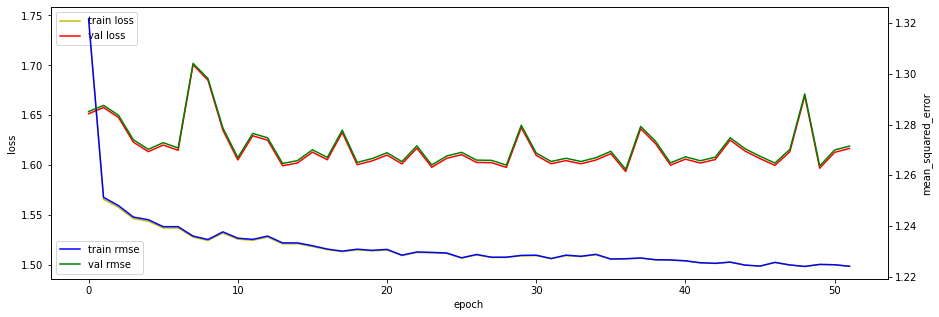

In [437]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(15, 5))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist_male.history['loss'], 'y', label='train loss')   # 훈련데이터의 loss (즉, mse)
loss_ax.plot(hist_male.history['val_loss'], 'r', label='val loss') # 검증데이터의 loss (즉, mse)

acc_ax.plot(hist_male.history['root_mean_squared_error'], 'b', label='train rmse')   # 훈련데이터의 mae
acc_ax.plot(hist_male.history['val_root_mean_squared_error'], 'g', label='val rmse') # 검증데이터의 mae

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mean_squared_error')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

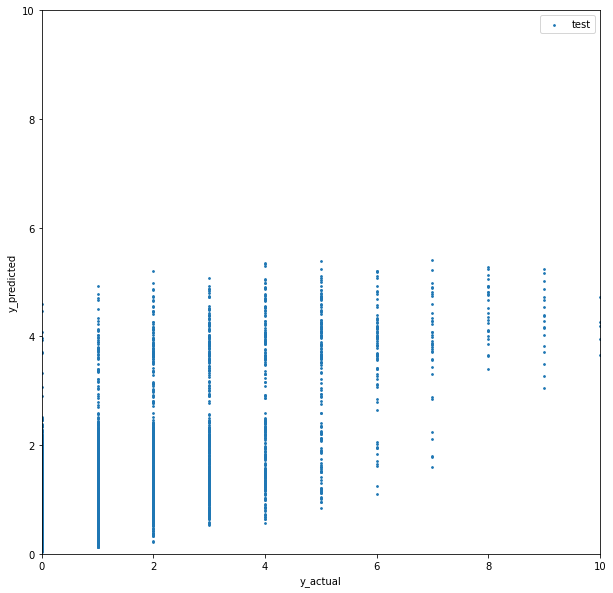

In [438]:
import matplotlib.pyplot as plt

# test data에 대한 예측값
y_m_pred = model_male.predict(X_m_test)

# 그림 가로, 세로 크기
plt.figure(figsize=(10,10))  

#test data의 실제 y값과 예측 y값을 입력 => y=x 그래프와 가까울수록 정확
plt.scatter(y_m_test, y_m_pred, label="test", s=3)  
# plt.title('test title')

# X축 이름
plt.xlabel('y_actual')   
# Y축 이름
plt.ylabel('y_predicted')

# 범례표시
plt.legend()

# X축 표시 범위, Y축 표시 범위 
plt.xlim((0,10))  
plt.ylim((0,10))  

plt.show()

## 2016년 예측(남자)

In [191]:
m_cols = ['area','mm','weekday','heat_wave','cold_wave','total_pop','elderly_ratio',
                          'pm10_7b','diff_hum','diff_temp','avg_ps',
                          'o3','avg_age','min_max_ps', 'avg_hum','frequency']

m_cols1 = ['area','mm','weekday','heat_wave','cold_wave','elderly_ratio','sex', 
            'sum_gsr', 'total_pop',
            'pm10_7b','diff_hum','diff_temp','avg_ps',
            'o3','min_max_ps', 'avg_hum','frequency']

In [440]:
# testset ('2016)
testset_male = hospital_m[hospital_m['yyyy'].astype(str).str.contains('2016')].reset_index(drop=True)
testset_male2 = testset_male[m_cols]

testset_male2.insert(1, 'area_label', testset_male2['area'].map(mapping))
testset_male2.drop(columns=['area'], inplace=True)

X_m_new = testset_male2.drop(['frequency'], axis=1)  # frequency NaN 이기 때문에 y_new 만들지 않음

print('X_m_new')
display(X_m_new.head())

# X를 정규화
X_m_norm_new = n_m_scaler.transform(X_m_new)   

# predict
y_m_pred = model_male.predict(X_m_norm_new)

# y_pred 음수일 경우 0으로 처리
new_y_m_pred = np.where(y_m_pred < 0, 0, y_m_pred)
new_y_m_pred

print("y_pred(male) = ", new_y_m_pred)

X_m_new


C:\Users\dltmf\AppData\Local\Temp\ipykernel_26928\2402936780.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testset_male2.drop(columns=['area'], inplace=True)


,area_label,mm,weekday,heat_wave,cold_wave,total_pop,elderly_ratio,pm10_7b,diff_hum,diff_temp,avg_ps,o3,avg_age,min_max_ps,avg_hum
0,0,1,4,0,0,781185,14.022671,61.954167,73.0,18.9,1030.230000,0.024237,41.4,8.010000,58.196911
1,1,1,4,0,0,6306634,8.966558,42.487621,45.0,12.1,1031.633333,0.014370,38.0,7.016667,70.844595
2,2,1,4,0,0,1695187,10.962802,29.128224,79.0,17.7,1031.175000,0.029582,39.3,5.616667,52.099421
3,3,1,4,0,0,1356568,14.384461,38.389385,66.0,20.0,1030.309524,0.033232,41.5,6.233333,57.314554
4,4,1,4,0,0,729995,9.572120,20.475000,40.0,10.0,1032.200000,0.025175,37.4,5.850000,62.837838


y_pred(male) =  [[1.140341 ]
 [4.27376  ]
 [1.8106236]
 ...
 [0.400459 ]
 [1.0748173]
 [0.9845264]]


In [441]:
hap_male = testset_male[['tma','area','sex','frequency']]
hap_male['frequency'] = new_y_m_pred
hap_male

C:\Users\dltmf\AppData\Local\Temp\ipykernel_26928\2816718633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hap_male['frequency'] = new_y_m_pred


,tma,area,sex,frequency
0,2016-01-01,강원,1,1.140341
1,2016-01-01,경기,1,4.273760
2,2016-01-01,경남,1,1.810624
3,2016-01-01,경북,1,1.596992
4,2016-01-01,광주,1,0.721123
...,...,...,...,...
6217,2016-12-31,전남,1,1.157070
6218,2016-12-31,전북,1,1.064786
6219,2016-12-31,제주,1,0.400459
6220,2016-12-31,충남,1,1.074817


## 검증데이터셋 형식으로 최종 merge

In [442]:
verify = pd.read_csv('Z:/공모전/날씨빅데이터콘테스트(공유)/hospital_data/2-2_검증데이터셋.csv', encoding='cp949')

hap_male.sort_values(['tma', 'area']).reset_index(drop=True)
hap_female.sort_values(['tma', 'area']).reset_index(drop=True)

hap = pd.concat([hap_male, hap_female], axis=0).reset_index(drop=True)
verify['frequency'] = hap['frequency']
verify[verify['frequency']<0] = 0  # 위에서 음수 선처리 하긴 했는데.. 혹시 모르니까 ^-^

verify

,yyyymmdd,area,sex,frequency
0,2016-01-01,강원,1,1.140341
1,2016-01-01,경기,1,4.273760
2,2016-01-01,경남,1,1.810624
3,2016-01-01,경북,1,1.596992
4,2016-01-01,광주,1,0.721123
...,...,...,...,...
12439,2016-12-31,전남,2,1.358788
12440,2016-12-31,전북,2,1.087176
12441,2016-12-31,제주,2,0.153340
12442,2016-12-31,충남,2,0.992945


In [443]:
verify.to_csv('Z:/공모전/날씨빅데이터콘테스트(공유)/검증데이터셋제출/220023_es_0804_3.csv', encoding='cp949', index=False)